In [12]:
import numpy as np
import cv2
import pandas as pd
import matplotlib
from matplotlib import pyplot as plt
%matplotlib inline

In [20]:
img = cv2.imread('./test_images/hpandya1.jpg')
img.shape

(196, 258, 3)

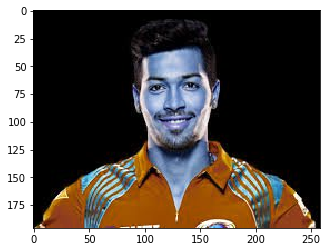

In [21]:
plt.imshow(img)

In [22]:
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
gray.shape

(196, 258)

In [23]:
gray

array([[  0,   0,   0, ...,   0,   0,   0],
       [  0,   0,   0, ...,   0,   0,   0],
       [  0,   0,   0, ...,   0,   0,   0],
       ...,
       [  5,  13,   7, ...,   3,   1,   0],
       [ 20,   1,  19, ...,   1,   1,   0],
       [  2,  42, 146, ...,   1,   1,   0]], dtype=uint8)

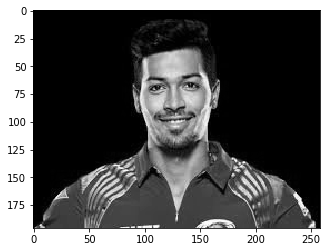

In [24]:
plt.imshow(gray, cmap='gray')

In [25]:
face_cascade = cv2.CascadeClassifier('./opencv/haarcascades/haarcascade_frontalface_default.xml')
eye_cascade = cv2.CascadeClassifier('./opencv/haarcascades/haarcascade_eye.xml')

faces = face_cascade.detectMultiScale(gray, 1.3, 5)
faces

array([[85, 35, 82, 82]], dtype=int32)

In [26]:
(x,y,w,h) = faces[0]
x,y,w,h

(85, 35, 82, 82)

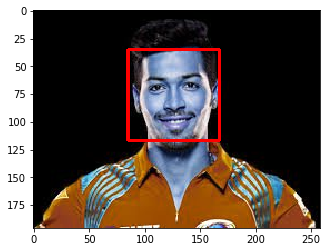

In [27]:
face_img = cv2.rectangle(img,(x,y),(x+w,y+h),(255,0,0),2)
plt.imshow(face_img)

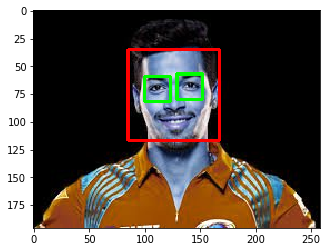

In [28]:
cv2.destroyAllWindows()
for (x,y,w,h) in faces:
    face_img = cv2.rectangle(img,(x,y),(x+w,y+h),(255,0,0),2)
    roi_gray = gray[y:y+h, x:x+w]
    roi_color = face_img[y:y+h, x:x+w]
    eyes = eye_cascade.detectMultiScale(roi_gray)
    for (ex,ey,ew,eh) in eyes:
        cv2.rectangle(roi_color,(ex,ey),(ex+ew,ey+eh),(0,255,0),2)
        

plt.figure()
plt.imshow(face_img, cmap='gray')
plt.show()

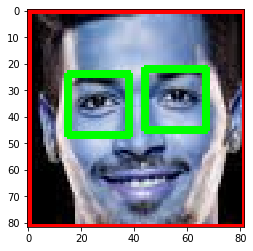

In [29]:
%matplotlib inline
plt.imshow(roi_color, cmap='gray')

In [30]:
import numpy as np
import pywt
import cv2    

def w2d(img, mode='haar', level=1):
    imArray = img
    #Datatype conversions
    #convert to grayscale
    imArray = cv2.cvtColor( imArray,cv2.COLOR_RGB2GRAY )
    #convert to float
    imArray =  np.float32(imArray)   
    imArray /= 255;
    # compute coefficients 
    coeffs=pywt.wavedec2(imArray, mode, level=level)

    #Process Coefficients
    coeffs_H=list(coeffs)  
    coeffs_H[0] *= 0;  

    # reconstruction
    imArray_H=pywt.waverec2(coeffs_H, mode);
    imArray_H *= 255;
    imArray_H =  np.uint8(imArray_H)

    return imArray_H

In [32]:
cropped_img = np.array(roi_color)
cropped_img.shape

(82, 82, 3)

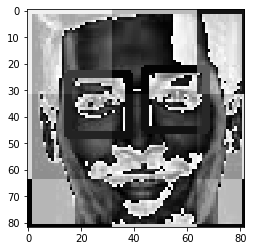

In [33]:
im_har = w2d(cropped_img,'db1',5)
plt.imshow(im_har, cmap='gray')

In [34]:
def get_cropped_image_if_2_eyes(image_path):
    img = cv2.imread(image_path)
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    faces = face_cascade.detectMultiScale(gray, 1.3, 5)
    for (x,y,w,h) in faces:
        roi_gray = gray[y:y+h, x:x+w]
        roi_color = img[y:y+h, x:x+w]
        eyes = eye_cascade.detectMultiScale(roi_gray)
        if len(eyes) >= 2:
            return roi_color

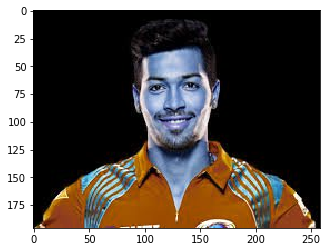

In [35]:
original_image = cv2.imread('./test_images/hpandya1.jpg')
plt.imshow(original_image)

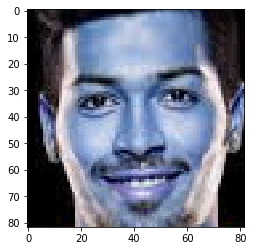

In [36]:
cropped_image = get_cropped_image_if_2_eyes('./test_images/hpandya1.jpg')
plt.imshow(cropped_image)

In [37]:
path_to_data = "./dataset/"
path_to_cr_data = "./dataset/cropped/"

In [38]:
import os
img_dirs = []
for entry in os.scandir(path_to_data):
    if entry.is_dir():
        img_dirs.append(entry.path)

In [39]:
img_dirs

['./dataset/bhuvneshwar_kumar',
 './dataset/dinesh_karthik',
 './dataset/hardik_pandya',
 './dataset/jasprit_bumrah',
 './dataset/k._l._rahul',
 './dataset/kedar_jadhav',
 './dataset/kuldeep_yadav',
 './dataset/mohammed_shami',
 './dataset/ms_dhoni',
 './dataset/ravindra_jadeja',
 './dataset/rohit_sharma',
 './dataset/shikhar_dhawan',
 './dataset/vijay_shankar',
 './dataset/virat_kohli',
 './dataset/yuzvendra_chahal']

In [40]:
import shutil
if os.path.exists(path_to_cr_data):
     shutil.rmtree(path_to_cr_data)
os.mkdir(path_to_cr_data)

In [41]:
cropped_image_dirs = []
celebrity_file_names_dict = {}
for img_dir in img_dirs:
    count = 1
    celebrity_name = img_dir.split('/')[-1]
    celebrity_file_names_dict[celebrity_name] = []
    for entry in os.scandir(img_dir):
        roi_color = get_cropped_image_if_2_eyes(entry.path)
        if roi_color is not None:
            cropped_folder = path_to_cr_data + celebrity_name
            if not os.path.exists(cropped_folder):
                os.makedirs(cropped_folder)
                cropped_image_dirs.append(cropped_folder)
                print("Generating cropped images in folder: ",cropped_folder)
            cropped_file_name = celebrity_name + str(count) + ".png"
            cropped_file_path = cropped_folder + "/" + cropped_file_name
            cv2.imwrite(cropped_file_path, roi_color)
            celebrity_file_names_dict[celebrity_name].append(cropped_file_path)
            count += 1

Generating cropped images in folder:  ./dataset/cropped/bhuvneshwar_kumar
Generating cropped images in folder:  ./dataset/cropped/dinesh_karthik
Generating cropped images in folder:  ./dataset/cropped/hardik_pandya
Generating cropped images in folder:  ./dataset/cropped/jasprit_bumrah
Generating cropped images in folder:  ./dataset/cropped/k._l._rahul
Generating cropped images in folder:  ./dataset/cropped/kedar_jadhav
Generating cropped images in folder:  ./dataset/cropped/kuldeep_yadav
Generating cropped images in folder:  ./dataset/cropped/mohammed_shami
Generating cropped images in folder:  ./dataset/cropped/ms_dhoni
Generating cropped images in folder:  ./dataset/cropped/ravindra_jadeja
Generating cropped images in folder:  ./dataset/cropped/rohit_sharma
Generating cropped images in folder:  ./dataset/cropped/shikhar_dhawan
Generating cropped images in folder:  ./dataset/cropped/vijay_shankar
Generating cropped images in folder:  ./dataset/cropped/virat_kohli
Generating cropped im

In [42]:
celebrity_file_names_dict = {}
for img_dir in cropped_image_dirs:
    celebrity_name = img_dir.split('/')[-1]
    file_list = []
    for entry in os.scandir(img_dir):
        file_list.append(entry.path)
    celebrity_file_names_dict[celebrity_name] = file_list
celebrity_file_names_dict

{'bhuvneshwar_kumar': ['./dataset/cropped/bhuvneshwar_kumar\\bhuvneshwar_kumar1.png',
  './dataset/cropped/bhuvneshwar_kumar\\bhuvneshwar_kumar10.png',
  './dataset/cropped/bhuvneshwar_kumar\\bhuvneshwar_kumar11.png',
  './dataset/cropped/bhuvneshwar_kumar\\bhuvneshwar_kumar12.png',
  './dataset/cropped/bhuvneshwar_kumar\\bhuvneshwar_kumar13.png',
  './dataset/cropped/bhuvneshwar_kumar\\bhuvneshwar_kumar14.png',
  './dataset/cropped/bhuvneshwar_kumar\\bhuvneshwar_kumar2.png',
  './dataset/cropped/bhuvneshwar_kumar\\bhuvneshwar_kumar3.png',
  './dataset/cropped/bhuvneshwar_kumar\\bhuvneshwar_kumar4.png',
  './dataset/cropped/bhuvneshwar_kumar\\bhuvneshwar_kumar5.png',
  './dataset/cropped/bhuvneshwar_kumar\\bhuvneshwar_kumar7.png',
  './dataset/cropped/bhuvneshwar_kumar\\bhuvneshwar_kumar8.png',
  './dataset/cropped/bhuvneshwar_kumar\\bhuvneshwar_kumar9.png'],
 'dinesh_karthik': ['./dataset/cropped/dinesh_karthik\\dinesh_karthik1.png',
  './dataset/cropped/dinesh_karthik\\dinesh_karthik

In [43]:
class_dict = {}
count = 0
for celebrity_name in celebrity_file_names_dict.keys():
    class_dict[celebrity_name] = count
    count = count + 1
class_dict

{'bhuvneshwar_kumar': 0,
 'dinesh_karthik': 1,
 'hardik_pandya': 2,
 'jasprit_bumrah': 3,
 'k._l._rahul': 4,
 'kedar_jadhav': 5,
 'kuldeep_yadav': 6,
 'mohammed_shami': 7,
 'ms_dhoni': 8,
 'ravindra_jadeja': 9,
 'rohit_sharma': 10,
 'shikhar_dhawan': 11,
 'vijay_shankar': 12,
 'virat_kohli': 13,
 'yuzvendra_chahal': 14}

In [44]:
X, y = [], []
for celebrity_name, training_files in celebrity_file_names_dict.items():
    for training_image in training_files:
        img = cv2.imread(training_image)
        if img is None:
            continue
        scalled_raw_img = cv2.resize(img, (32, 32))
        img_har = w2d(img,'db1',5)
        scalled_img_har = cv2.resize(img_har, (32, 32))
        combined_img = np.vstack((scalled_raw_img.reshape(32*32*3,1),scalled_img_har.reshape(32*32,1)))
        X.append(combined_img)
        y.append(class_dict[celebrity_name])

In [45]:
len(X)

228

In [46]:
X = np.array(X).reshape(len(X),4096).astype(float)
X.shape

(228, 4096)

In [47]:
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report

In [51]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

pipe = Pipeline([('scaler', StandardScaler()), ('svc', SVC(kernel = 'rbf', C = 10))])
pipe.fit(X_train, y_train)
pipe.score(X_test, y_test)

0.49122807017543857

In [53]:
print(classification_report(y_test, pipe.predict(X_test)))


              precision    recall  f1-score   support

           0       0.50      0.25      0.33         4
           1       0.00      0.00      0.00         3
           2       0.25      1.00      0.40         1
           3       0.00      0.00      0.00         1
           4       0.33      1.00      0.50         2
           5       0.00      0.00      0.00         5
           7       0.33      0.50      0.40         2
           8       0.46      0.75      0.57         8
           9       0.50      0.29      0.36         7
          10       0.62      0.89      0.73         9
          11       1.00      0.50      0.67         2
          12       1.00      0.25      0.40         4
          13       0.50      0.62      0.56         8
          14       0.00      0.00      0.00         1

    accuracy                           0.49        57
   macro avg       0.39      0.43      0.35        57
weighted avg       0.46      0.49      0.43        57



F:\anaconda3pkd\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [54]:
from sklearn import svm
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import GridSearchCV

In [55]:
model_params = {
    'svm': {
        'model': svm.SVC(gamma='auto',probability=True),
        'params' : {
            'svc__C': [1,10,100,1000],
            'svc__kernel': ['rbf','linear']
        }  
    },
    'random_forest': {
        'model': RandomForestClassifier(),
        'params' : {
            'randomforestclassifier__n_estimators': [1,5,10]
        }
    },
    'logistic_regression' : {
        'model': LogisticRegression(solver='liblinear',multi_class='auto'),
        'params': {
            'logisticregression__C': [1,5,10]
        }
    }
}

In [58]:
scores = []
best_estimators = {}
import pandas as pd
for algo, mp in model_params.items():
    pipe = make_pipeline(StandardScaler(), mp['model'])
    clf =  GridSearchCV(pipe, mp['params'], cv=5, return_train_score=False)
    clf.fit(X_train, y_train)
    scores.append({
        'model': algo,
        'best_score': clf.best_score_,
        'best_params': clf.best_params_
    })
    best_estimators[algo] = clf.best_estimator_
    
df = pd.DataFrame(scores,columns=['model','best_score','best_params'])
df

F:\anaconda3pkd\lib\site-packages\sklearn\model_selection\_split.py:667: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=5.
  % (min_groups, self.n_splits)), UserWarning)
F:\anaconda3pkd\lib\site-packages\sklearn\model_selection\_split.py:667: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=5.
  % (min_groups, self.n_splits)), UserWarning)
F:\anaconda3pkd\lib\site-packages\sklearn\model_selection\_split.py:667: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=5.
  % (min_groups, self.n_splits)), UserWarning)


,model,best_score,best_params
0,svm,0.356471,"{'svc__C': 1, 'svc__kernel': 'linear'}"
1,random_forest,0.216807,{'randomforestclassifier__n_estimators': 10}
2,logistic_regression,0.449916,{'logisticregression__C': 1}


In [59]:
best_estimators

{'svm': Pipeline(memory=None,
          steps=[('standardscaler',
                  StandardScaler(copy=True, with_mean=True, with_std=True)),
                 ('svc',
                  SVC(C=1, break_ties=False, cache_size=200, class_weight=None,
                      coef0=0.0, decision_function_shape='ovr', degree=3,
                      gamma='auto', kernel='linear', max_iter=-1,
                      probability=True, random_state=None, shrinking=True,
                      tol=0.001, verbose=False))],
          verbose=False),
 'random_forest': Pipeline(memory=None,
          steps=[('standardscaler',
                  StandardScaler(copy=True, with_mean=True, with_std=True)),
                 ('randomforestclassifier',
                  RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                         class_weight=None, criterion='gini',
                                         max_depth=None, max_features='auto',
                                   

In [60]:
best_estimators['svm'].score(X_test,y_test)

0.543859649122807

In [61]:
best_estimators['random_forest'].score(X_test,y_test)

0.3157894736842105

In [62]:
best_estimators['logistic_regression'].score(X_test,y_test)

0.6491228070175439

In [63]:
best_clf = best_estimators['svm']

In [64]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, best_clf.predict(X_test))
cm

array([[2, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 2, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [1, 0, 2, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 1, 0, 0, 0, 6, 0, 0, 0, 0, 0, 1],
       [0, 0, 0, 0, 1, 0, 1, 0, 0, 2, 2, 0, 1, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 8, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0],
       [0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0],
       [0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 6, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1]], dtype=int64)

Text(69.0, 0.5, 'Truth')

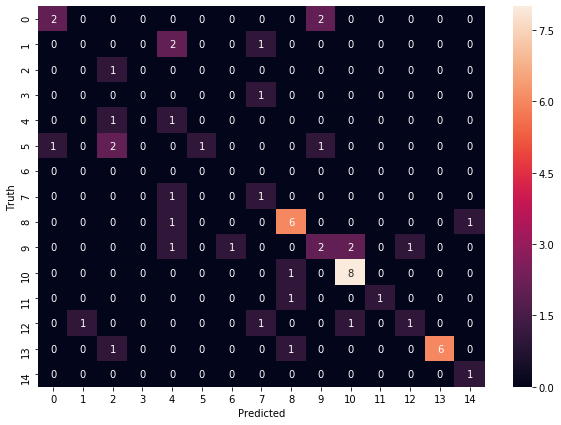

In [65]:
import seaborn as sn
plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [66]:
class_dict

{'bhuvneshwar_kumar': 0,
 'dinesh_karthik': 1,
 'hardik_pandya': 2,
 'jasprit_bumrah': 3,
 'k._l._rahul': 4,
 'kedar_jadhav': 5,
 'kuldeep_yadav': 6,
 'mohammed_shami': 7,
 'ms_dhoni': 8,
 'ravindra_jadeja': 9,
 'rohit_sharma': 10,
 'shikhar_dhawan': 11,
 'vijay_shankar': 12,
 'virat_kohli': 13,
 'yuzvendra_chahal': 14}

In [67]:
!pip install joblib
import joblib 
# Save the model as a pickle in a file 
joblib.dump(best_clf, 'saved_model.pkl')

['saved_model.pkl']

In [68]:
import json
with open("class_dictionary.json","w") as f:
    f.write(json.dumps(class_dict))